In [51]:
import pandas as pd
import numpy as np

# COVID-19 data

Total

In [52]:
world_ts = pd.read_csv('output_data/time_series/ts-world-covid19.csv')
world_ts['Date_Confirmed'] = pd.DatetimeIndex(world_ts['Date_Confirmed'])
world_ts = world_ts[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US']]

In [53]:
mexico_ts = pd.read_csv('output_data/time_series/ts-mexico-covid19.csv')
mexico_ts['Date_Confirmed'] = pd.DatetimeIndex(mexico_ts['Date_Confirmed'])
mexico_ts['Mexico'] = mexico_ts.sum(axis=1) # Sum rows for Mexico total

Daily

In [54]:
world_daily = pd.read_csv('output_data/time_series/daily-world_covid19.csv')
world_daily['Date_Confirmed'] = pd.DatetimeIndex(world_daily['Date_Confirmed'])
world_daily = world_daily[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US']]

In [55]:
mexico_daily = pd.read_csv('output_data/time_series/daily-mexico-covid19.csv')
mexico_daily['Date_Confirmed'] = pd.DatetimeIndex(mexico_daily['Date_Confirmed'])
mexico_daily['Mexico'] = mexico_daily.sum(axis=1) # Sum rows for Mexico total

# Tables

In [56]:
import janitor

In [57]:
# Only sensible way to filter data smh
world_ts = world_ts.filter_date('Date_Confirmed','2020-02-20','2020-04-15')
mexico_ts = mexico_ts.filter_date('Date_Confirmed','2020-02-20','2020-04-15')
world_daily = world_daily.filter_date('Date_Confirmed','2020-02-20','2020-04-15')
mexico_daily = mexico_daily.filter_date('Date_Confirmed','2020-02-20','2020-04-15')

In [58]:
ts_totals = world_ts.merge(mexico_ts, on='Date_Confirmed', how='outer')
ts_totals = ts_totals.fillna(method='ffill') # First fill missing time series totals with previous row value
ts_totals = ts_totals.replace(0, np.nan) # Now convert 0 to NaN

In [59]:
ts_daily = world_daily.merge(mexico_daily, on='Date_Confirmed', how='outer')

In [60]:
ts_totals.to_csv('output_data/time_series/totals.csv', index=False)
ts_daily.to_csv('output_data/time_series/daily.csv', index=False)

# Plots

In [61]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Growth rate

#### World

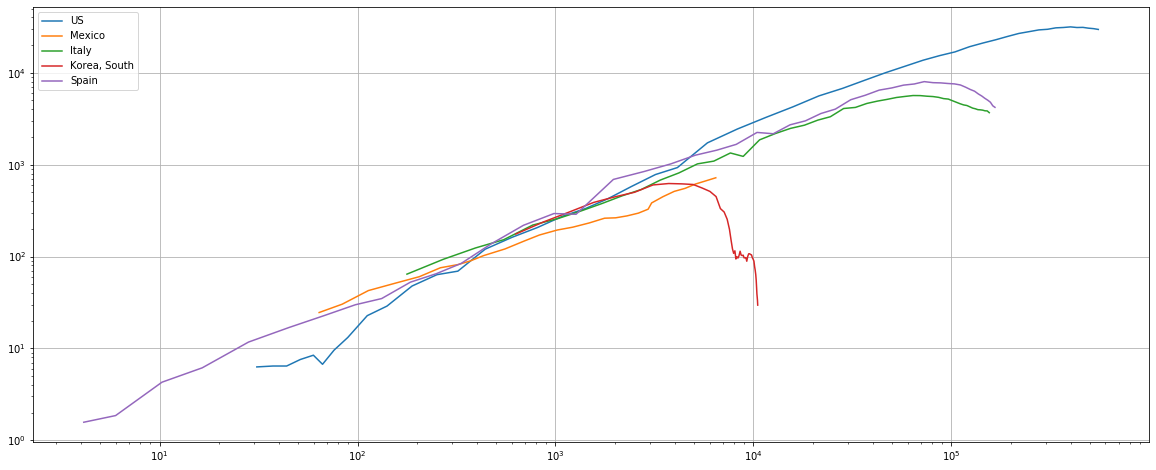

In [62]:
plt.figure(figsize=(20,8))

for region in ['US','Mexico','Italy','Korea, South','Spain']:
    plt.plot(list(ts_totals[region].rolling(window=7).mean()), list(ts_daily[region].rolling(window=7).mean()), label=region)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

#### World + Mexico states

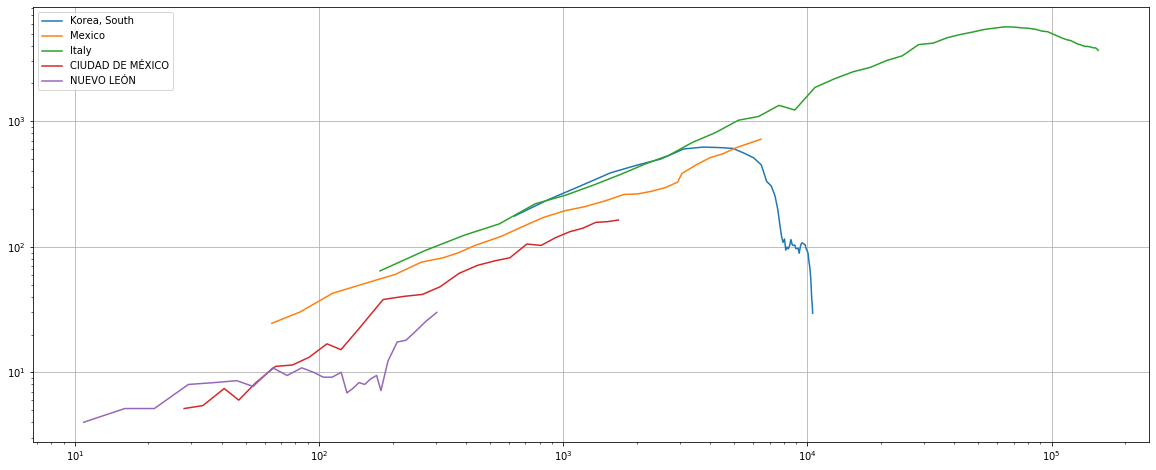

In [63]:
plt.figure(figsize=(20,8))

for state in ['Korea, South','Mexico','Italy','CIUDAD DE MÉXICO','NUEVO LEÓN']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

#### Mexico states

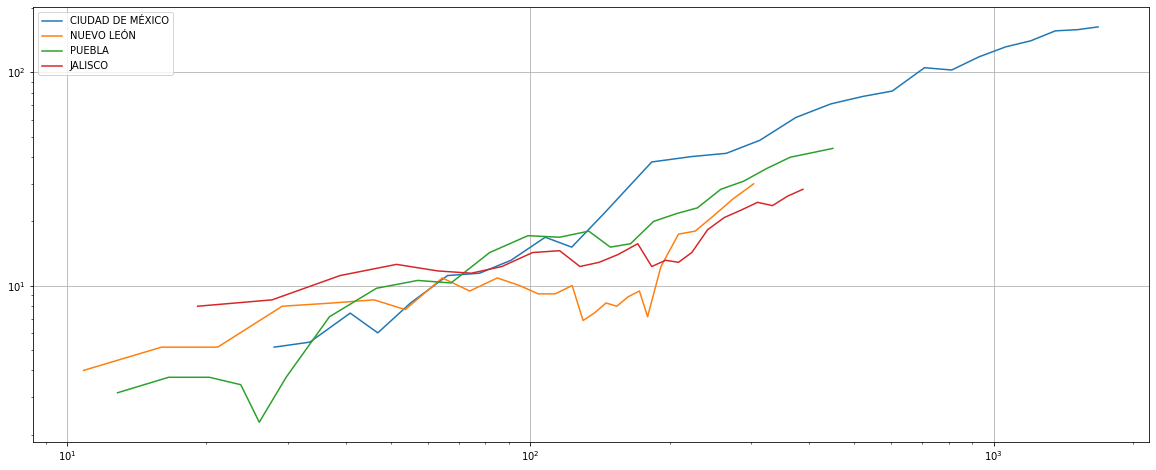

In [64]:
plt.figure(figsize=(20,8))

for state in ['CIUDAD DE MÉXICO', 'NUEVO LEÓN', 'PUEBLA', 'JALISCO']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()